# Predicting House Sale Prices

**Goal:** Train a model to predict house prices using a provided dataset.


First, we need to import the necessary modules and libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# to display generated plots directly within the output cells of the notebook, rather than in separate pop-up windows.
%matplotlib inline           

Now we need to load the dataset into the variable **'data'** but first we have to find the location of the dataset **'train.csv'**
 
The **"data"** directory and the **"notebooks"** directory are both included in the **"house-prices-ml"** directory which is the parent folder or the project root

In [2]:
cwd=os.getcwd()

# If cwd ends with "notebooks", assume project root is parent folder
if os.path.basename(cwd).lower() == "notebooks":
    PROJECT_ROOT = os.path.abspath(os.path.join(cwd, ".."))
else:
    PROJECT_ROOT = cwd

DATA_DIR = os.path.join(PROJECT_ROOT, "data")
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
print("Current working dir:", cwd)
print("Project root set to:", PROJECT_ROOT)
print("Looking for dataset at:", TRAIN_CSV)


Current working dir: C:\Users\pc\OneDrive\Documents\Codes\Python codes\Machine Learning\Projects\House Price Prediction\house-prices-ml\notebooks
Project root set to: C:\Users\pc\OneDrive\Documents\Codes\Python codes\Machine Learning\Projects\House Price Prediction\house-prices-ml
Looking for dataset at: C:\Users\pc\OneDrive\Documents\Codes\Python codes\Machine Learning\Projects\House Price Prediction\house-prices-ml\data\train.csv


Now we are going to load the dataset into the **'data'** variable

In [3]:
data=pd.read_csv(TRAIN_CSV)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In order to know our dataset better let's look at some information regarding our training set

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Handling null values for numerical datatypes ##

In [8]:
numerical_columns=data.select_dtypes(include=[np.number])
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [9]:
numerical_columns.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

So we need to handle null values in the following columns: **'LotFrontage'**, **'MasVnrArea'** and **'GarageYrBlt'**

- For **'LotFrontage'**: we will replace all the **'NA'** values with the **median** of this column
- For **'MasVnrArea'**: we will replace all the **'NA'** values with the **median** of this column
- For **'GarageYrBlt'**: an **'NA'** value means that there is no garage so we will replace **'NA'** with **0**

In [10]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [11]:
new_numerical_columns=data.select_dtypes(include=[np.number])
new_numerical_columns.isnull().sum()             # To check if we still have any missing values

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## Handling null values for categorical datatypes ##

In [12]:
categorical_columns=data.select_dtypes(include=object)
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [13]:
categorical_columns.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

It looks like we need to handle null values for the following columns: **'Alley'**, **'MasVnrType'**, **'BsmtQual'**, **'BsmtCond'**, **'BsmtExposure'**, **'BsmtFinType1'**, **'BsmtFinType2'**, **'Electrical'**, **'FirePlaceQu'**, **'GarageType'**, **'GarageFinish'**, **'GarageQual'**, **'GarageCond'**, **'PoolQC'**, **'Fence'** and **'MiscFeature'**

- For **'Alley'**: an **'NA'** value means no alley access so we will replace it with **'No Alley'**
- For **'MasVnrType'**: a **'None'** value means no masonry veneer so we will replace it with **'No Masonry Veneer'**  but an **'NA'** value indicates a missing value so we will replace it with the mode of this column which is **'None'** so it will be replaced with **'No Masonry Veneer'**
- For **'BsmtQual'**: an **'NA'** value means no basement so we will replace it with **'No Basement'**
- For **'BsmtCond'**: an **'NA'** value means no basement so we will replace it with **'No Basement'**
- For **'BsmtExposure'**: an **'NA'** value means no basement so we will replace it with **'No Basement'**
- For **'BsmtFinType1'**: an **'NA'** value means no basement so we will replace it with **'No Basement'**
- For **'BsmtFinType2'**: an **'NA'** value means no basement so we will replace it with **'No Basement'**
- For **'Electrical'**: an **'NA'** value means a missing value so we will replace it with the mode of this column
- For **'FireplaceQu'**: an **'NA'** value means no Fireplace so we will replace it with **'No Fireplace'**
- For **'GarageType'**: an **'NA'** value means no garage so we will replace it with **'No Garage'**
- For **'GarageFinish'**: an **'NA'** value means no garage so we will replace it with **'No Garage'**
- For **'GarageQual'**: an **'NA'** value means no garage so we will replace it with **'No Garage'**
- For **'GarageCond'**: an **'NA'** value means no garage so we will replace it with **'No Garage'**
- For **'PoolQC'**: an **'NA'** value means no pool so we will replace it with **'No Pool'**
- For **'Fence'**: an **'NA'** value means no fence so we will replace it with **'No Fence'**
- For **'MiscFeature'**: an **'NA'** value means no other miscellaneous feature so we will replace it with **'No Miscellaneous feature'**


In [14]:
data['Alley']=data['Alley'].fillna('No Alley')
data['MasVnrType'] = data['MasVnrType'].replace('None', 'No Masonry Veneer')
data['MasVnrType'] = data['MasVnrType'].fillna('No Masonry Veneer')
data['BsmtQual']=data['BsmtQual'].fillna('No Basement')
data['BsmtCond']=data['BsmtCond'].fillna('No Basement')
data['BsmtExposure']=data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('No Basement')
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna('No Fireplace')
data['GarageType']=data['GarageType'].fillna('No Garage')
data['GarageFinish']=data['GarageFinish'].fillna('No Garage')
data['GarageQual']=data['GarageQual'].fillna('No Garage')
data['GarageCond']=data['GarageCond'].fillna('No Garage')
data['PoolQC']=data['PoolQC'].fillna('No Pool')
data['Fence']=data['Fence'].fillna('No Fence')
data['MiscFeature']=data['MiscFeature'].fillna('No Miscellaneous feature')


In [15]:
new_categorical_columns=data.select_dtypes(include=object)
new_categorical_columns.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Removing outliers ##

Now we will search and remove the **outliers** in our dataset

We will search the following columns to check for outliers:

**'LotFrontage'**, **'LotArea'**, **'MasVnrArea'**, **'BsmtFinSF1'**, **'BsmtFinSF2'**, **'BsmtUnfSF'**, **'TotalBsmtSF'**, **'1stFlrSF'**, **'2ndFlrSF'**, **'LowQualFinSF'**, **'GrLivArea'**, **'GarageArea'**, **'WoodDeckSF'**, **'OpenPorchSF'**, **'EnclosedPorch'**, **'3SsnPorch'**, **'ScreenPorch'**, **'PoolArea'** and **'MiscVal'**.

<Axes: ylabel='MiscVal'>

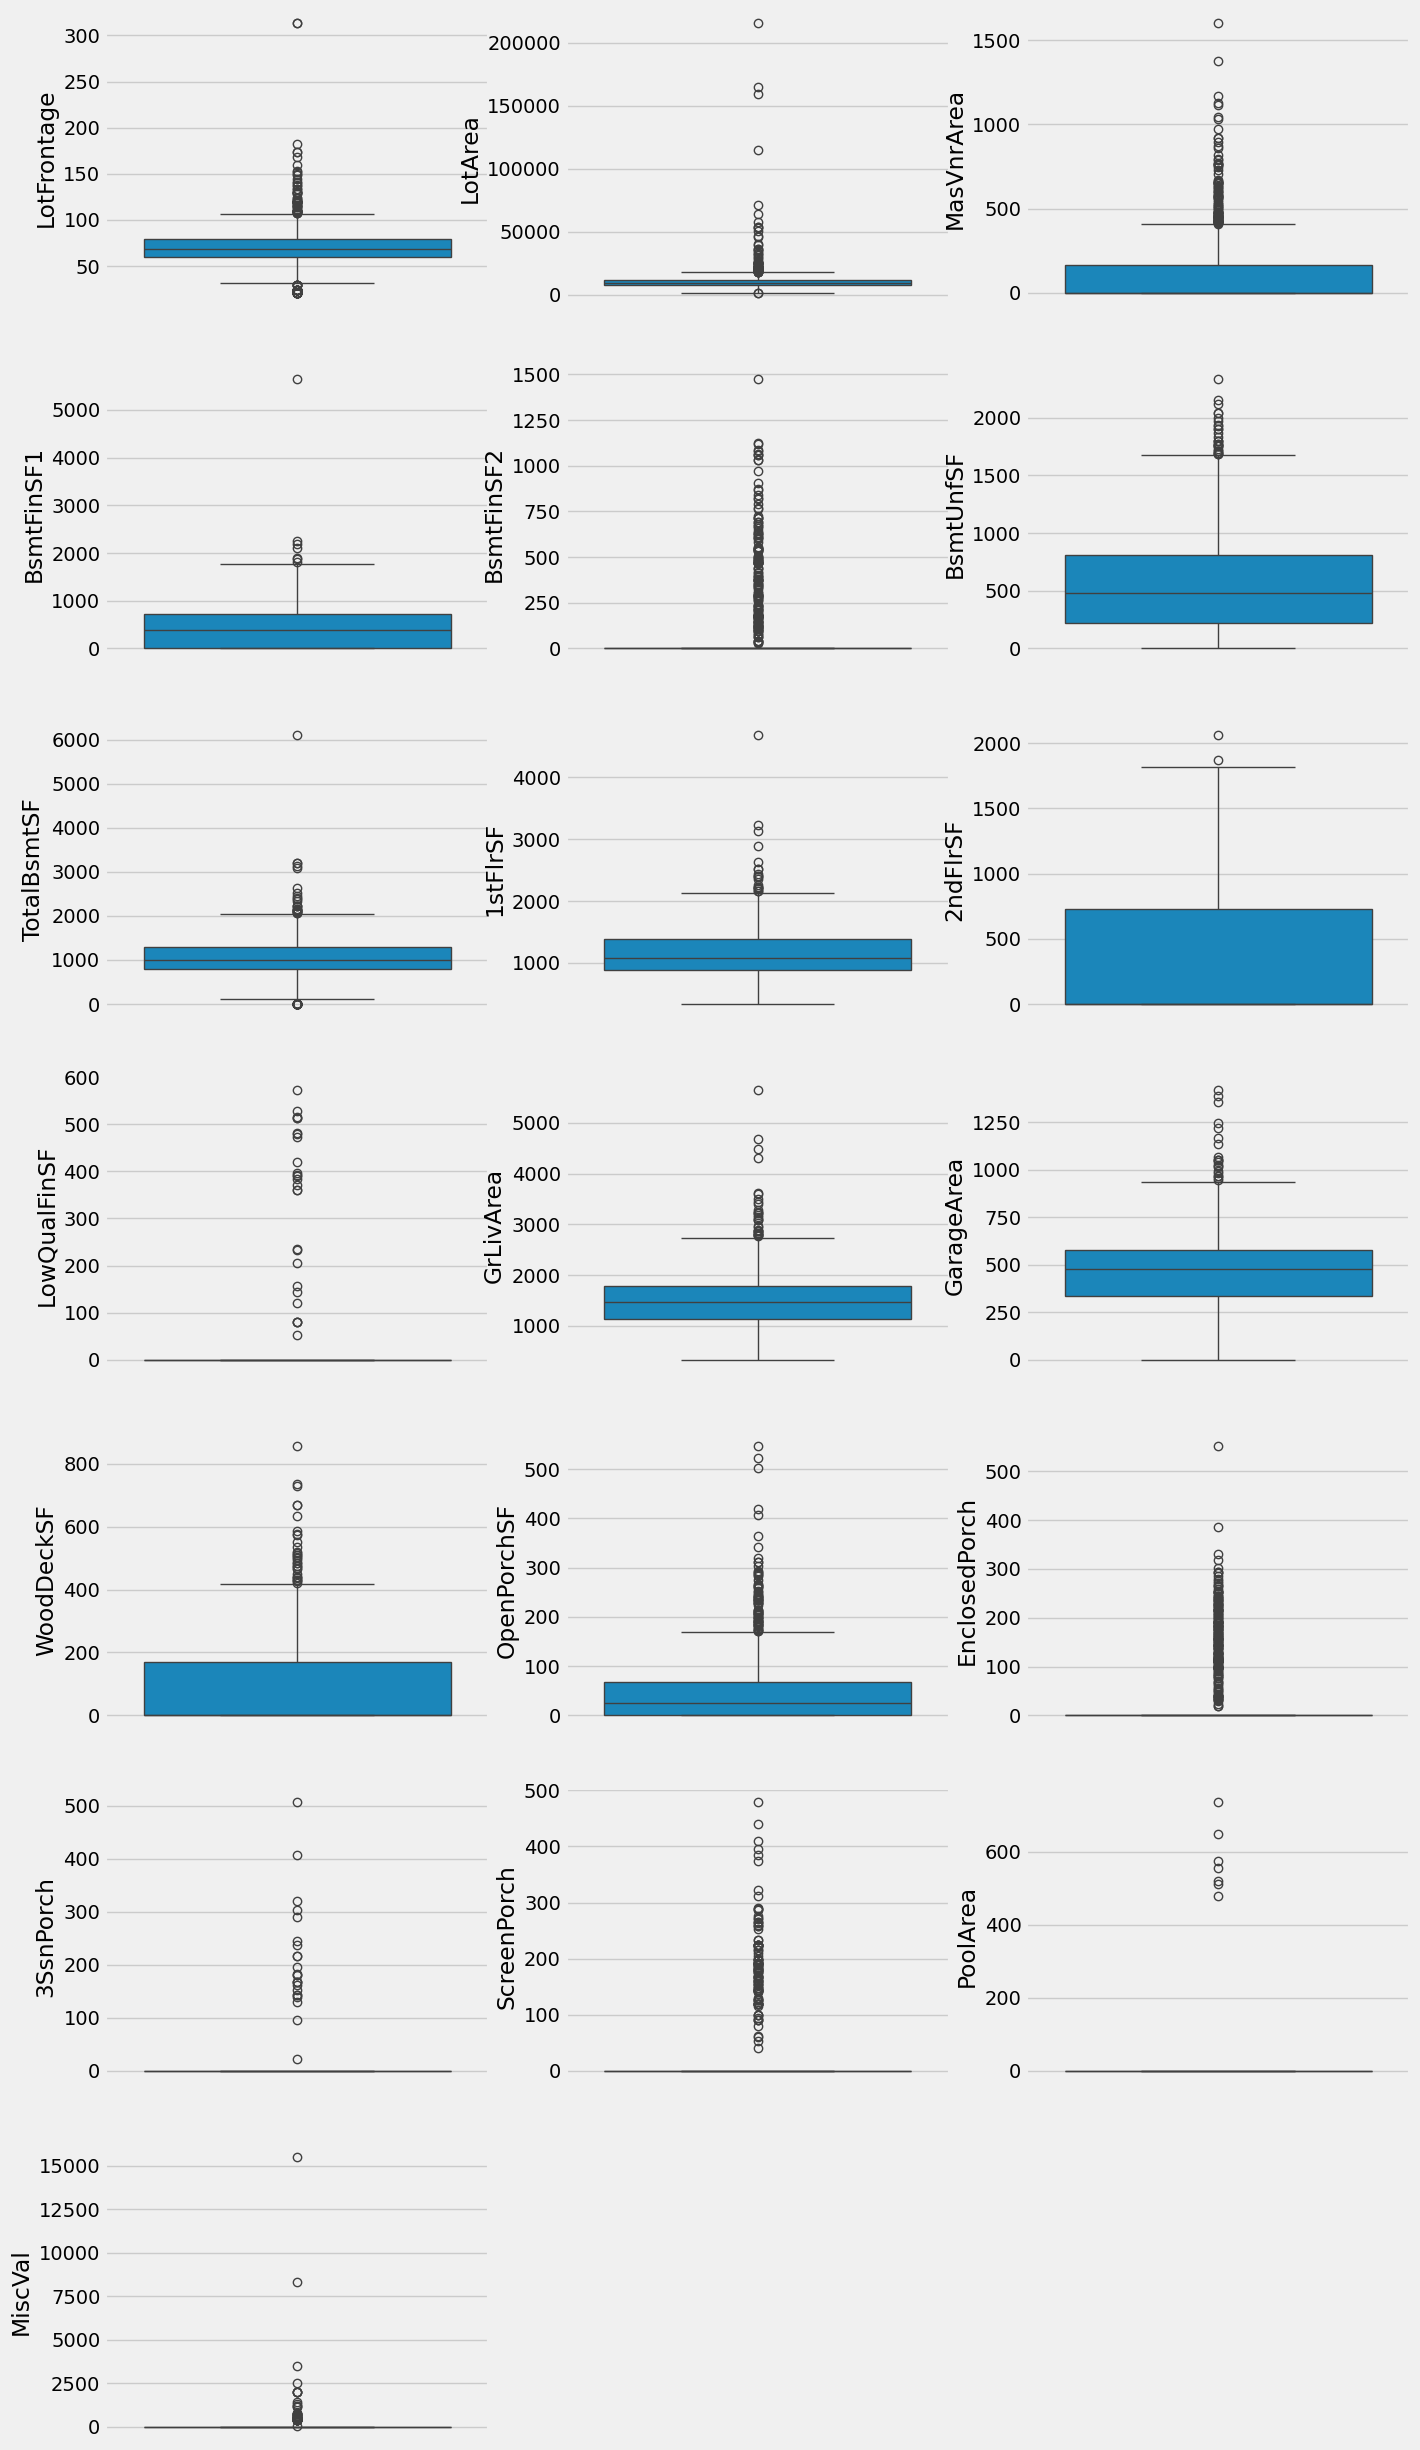

In [16]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,30)

plt.subplot(7,3,1)
sns.boxplot(data['LotFrontage'])
plt.subplot(7,3,2)
sns.boxplot(data['LotArea'])
plt.subplot(7,3,3)
sns.boxplot(data['MasVnrArea'])
plt.subplot(7,3,4)
sns.boxplot(data['BsmtFinSF1'])
plt.subplot(7,3,5)
sns.boxplot(data['BsmtFinSF2'])
plt.subplot(7,3,6)
sns.boxplot(data['BsmtUnfSF'])
plt.subplot(7,3,7)
sns.boxplot(data['TotalBsmtSF'])
plt.subplot(7,3,8)
sns.boxplot(data['1stFlrSF'])
plt.subplot(7,3,9)
sns.boxplot(data['2ndFlrSF'])
plt.subplot(7,3,10)
sns.boxplot(data['LowQualFinSF'])
plt.subplot(7,3,11)
sns.boxplot(data['GrLivArea'])
plt.subplot(7,3,12)
sns.boxplot(data['GarageArea'])
plt.subplot(7,3,13)
sns.boxplot(data['WoodDeckSF'])
plt.subplot(7,3,14)
sns.boxplot(data['OpenPorchSF'])
plt.subplot(7,3,15)
sns.boxplot(data['EnclosedPorch'])
plt.subplot(7,3,16)
sns.boxplot(data['3SsnPorch'])
plt.subplot(7,3,17)
sns.boxplot(data['ScreenPorch'])
plt.subplot(7,3,18)
sns.boxplot(data['PoolArea'])
plt.subplot(7,3,19)
sns.boxplot(data['MiscVal'])
 

In [17]:
data = data[data['LotFrontage']<200]
data = data[data['LotArea']<80000]
data = data[data['MasVnrArea']<1250]
data = data[data['BsmtFinSF1']<2500]
data = data[data['BsmtFinSF2']<1250]
data = data[data['TotalBsmtSF']<3500]
data = data[data['1stFlrSF']<3500]
data = data[data['2ndFlrSF']<1900]
data = data[data['GrLivArea']<3900]
data = data[data['WoodDeckSF']<800]
data = data[data['OpenPorchSF']<400]
data = data[data['EnclosedPorch']<350]
data = data[data['3SsnPorch']<400]
data = data[data['ScreenPorch']<400]


## Transforming the data ##

Let's visualize the data to see if we need to apply a transformation to any feature

We will check these quantitative columns:

**'LotFrontage'**, **'LotArea'**, **'MasVnrArea'**, **'BsmtFinSF1'**, **'BsmtFinSF2'**, **'BsmtUnfSF'**, **'TotalBsmtSF'**, **'1stFlrSF'**, **'2ndFlrSF'**, **'LowQualFinSF'**, **'GrLivArea'**, **'GarageArea'**, **'WoodDeckSF'**, **'OpenPorchSF'**, **'EnclosedPorch'**, **'3SsnPorch'**, **'ScreenPorch'**, **'PoolArea'** and **'MiscVal'**.

<Axes: xlabel='SalePrice', ylabel='Density'>

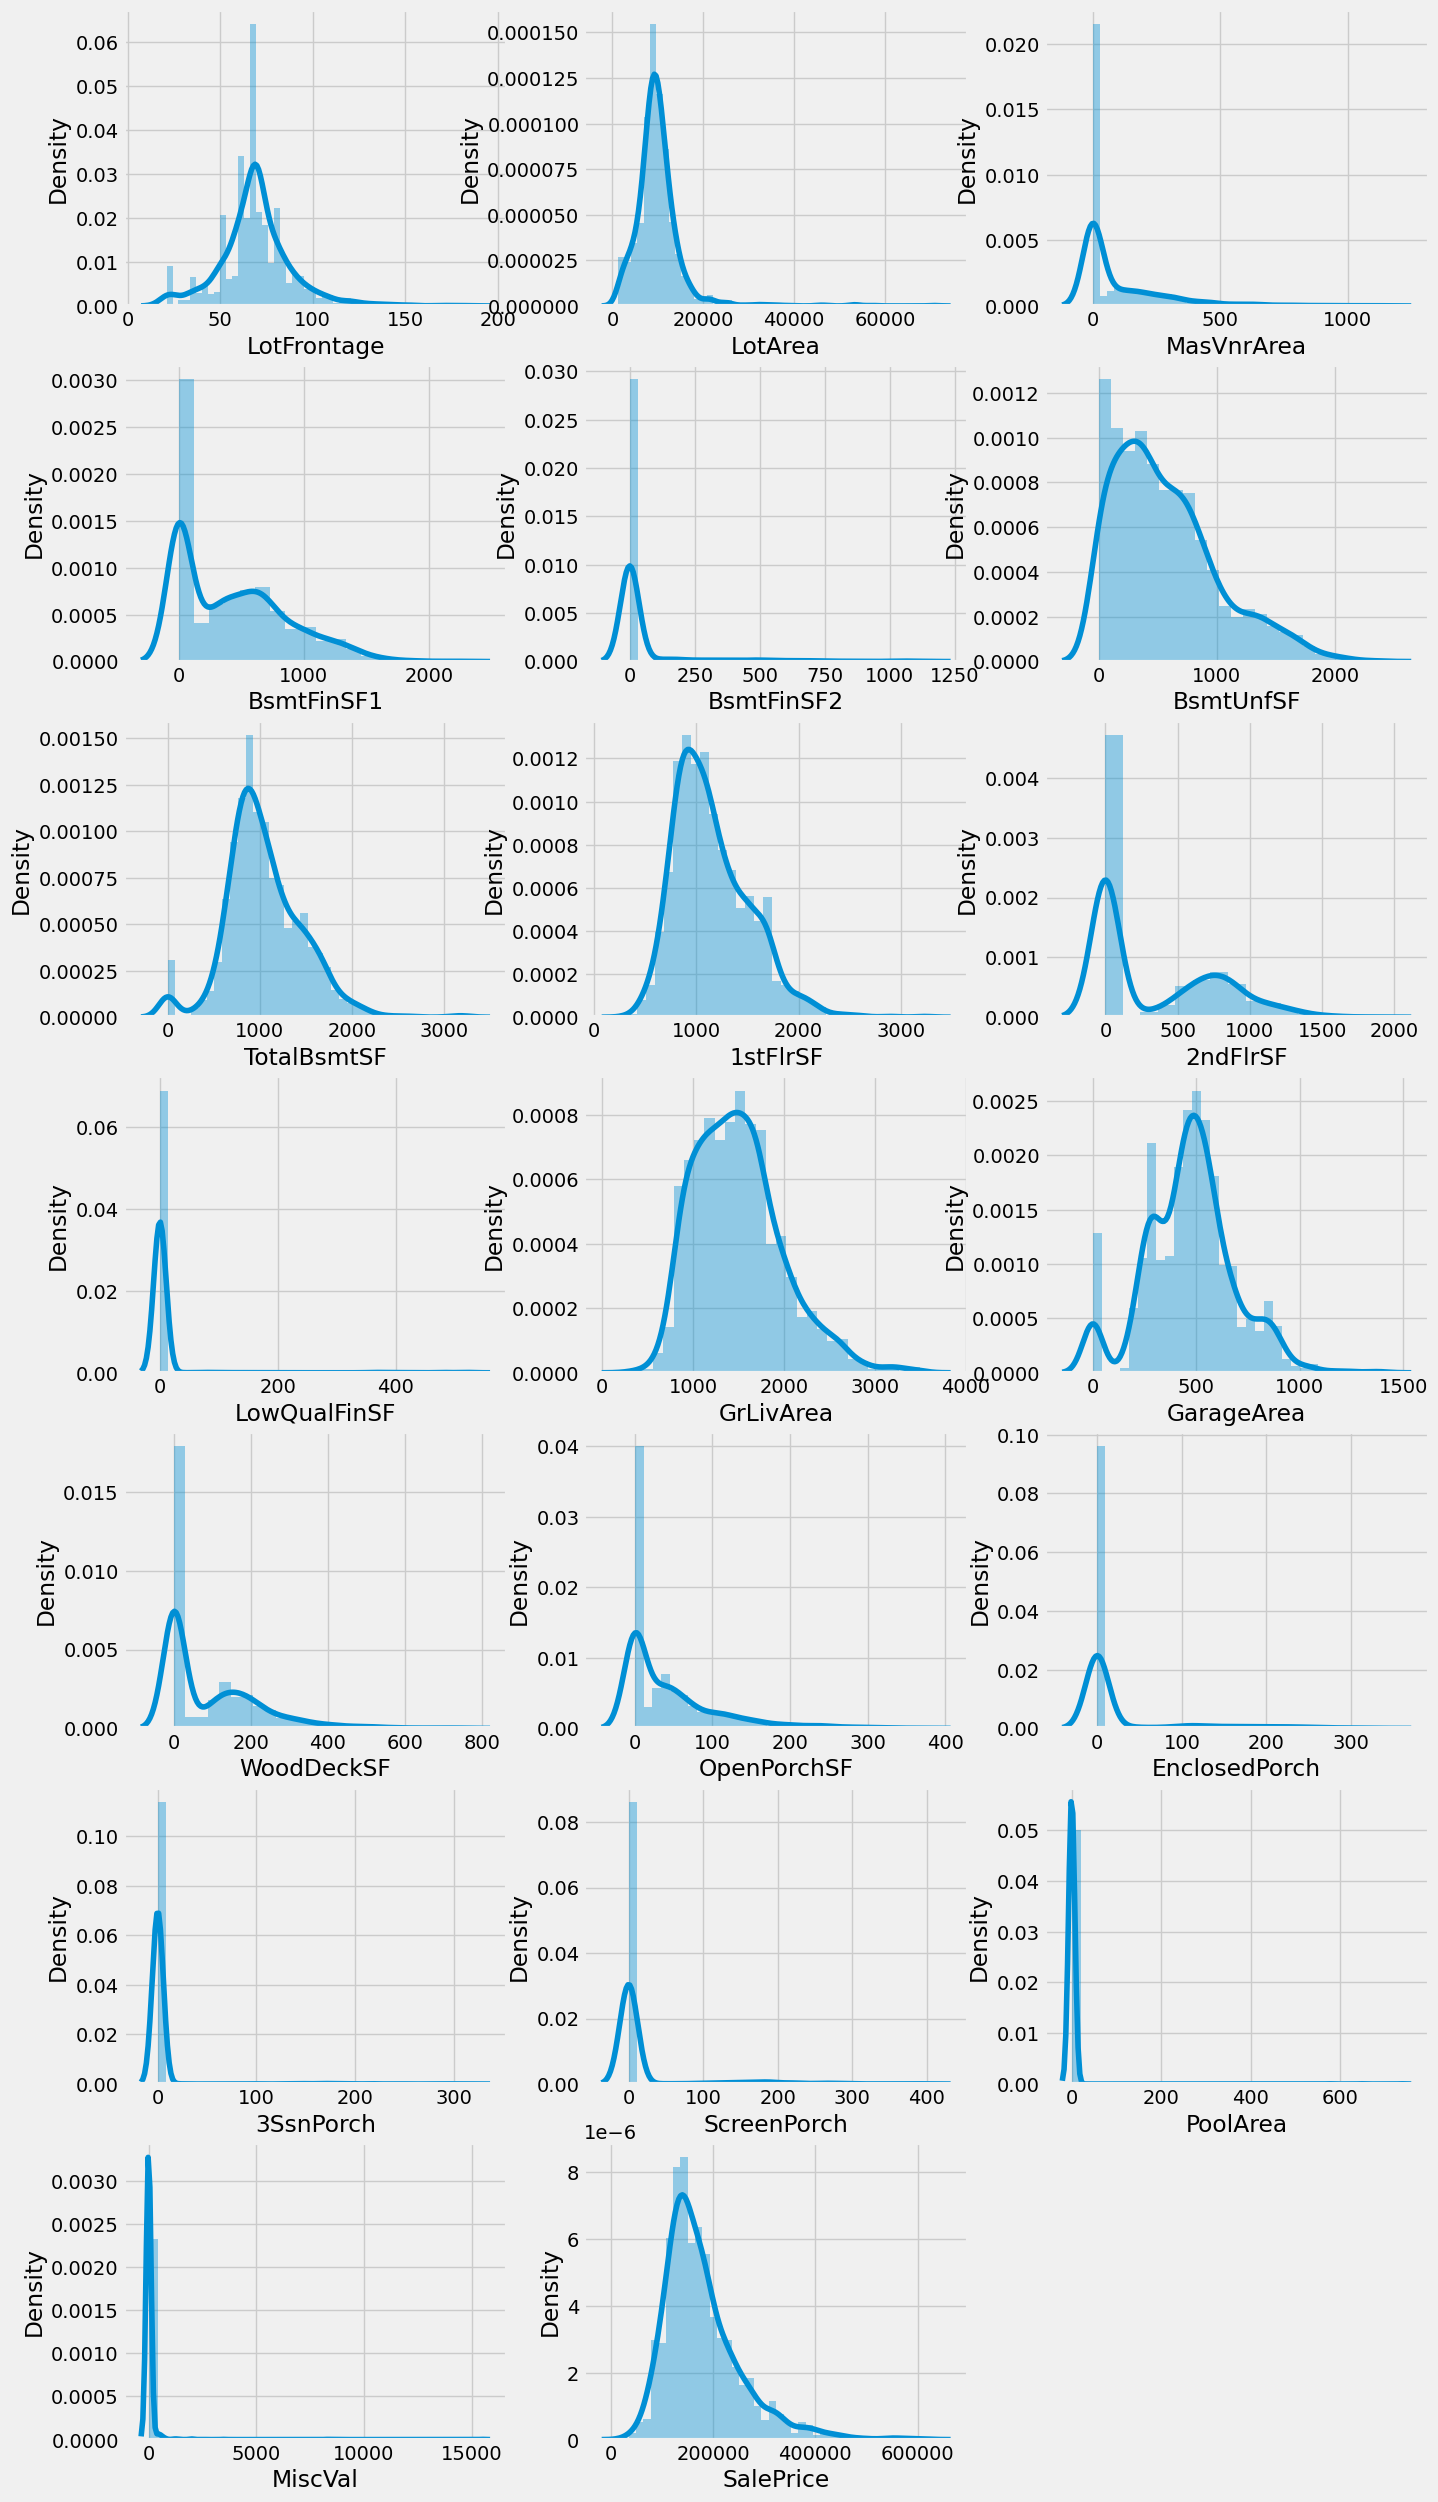

In [18]:
quant_columns=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,30)
for i in range(len(quant_columns)):
    plt.subplot(7,3,i+1)
    sns.distplot(data[quant_columns[i]])
plt.subplot(7,3,20)
sns.distplot(data['SalePrice'])

The data observed is right skewed so we will apply a **log transformation**

In [19]:
for i in quant_columns:
    data[i]=np.log1p(data[i])
data['SalePrice']=np.log1p(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

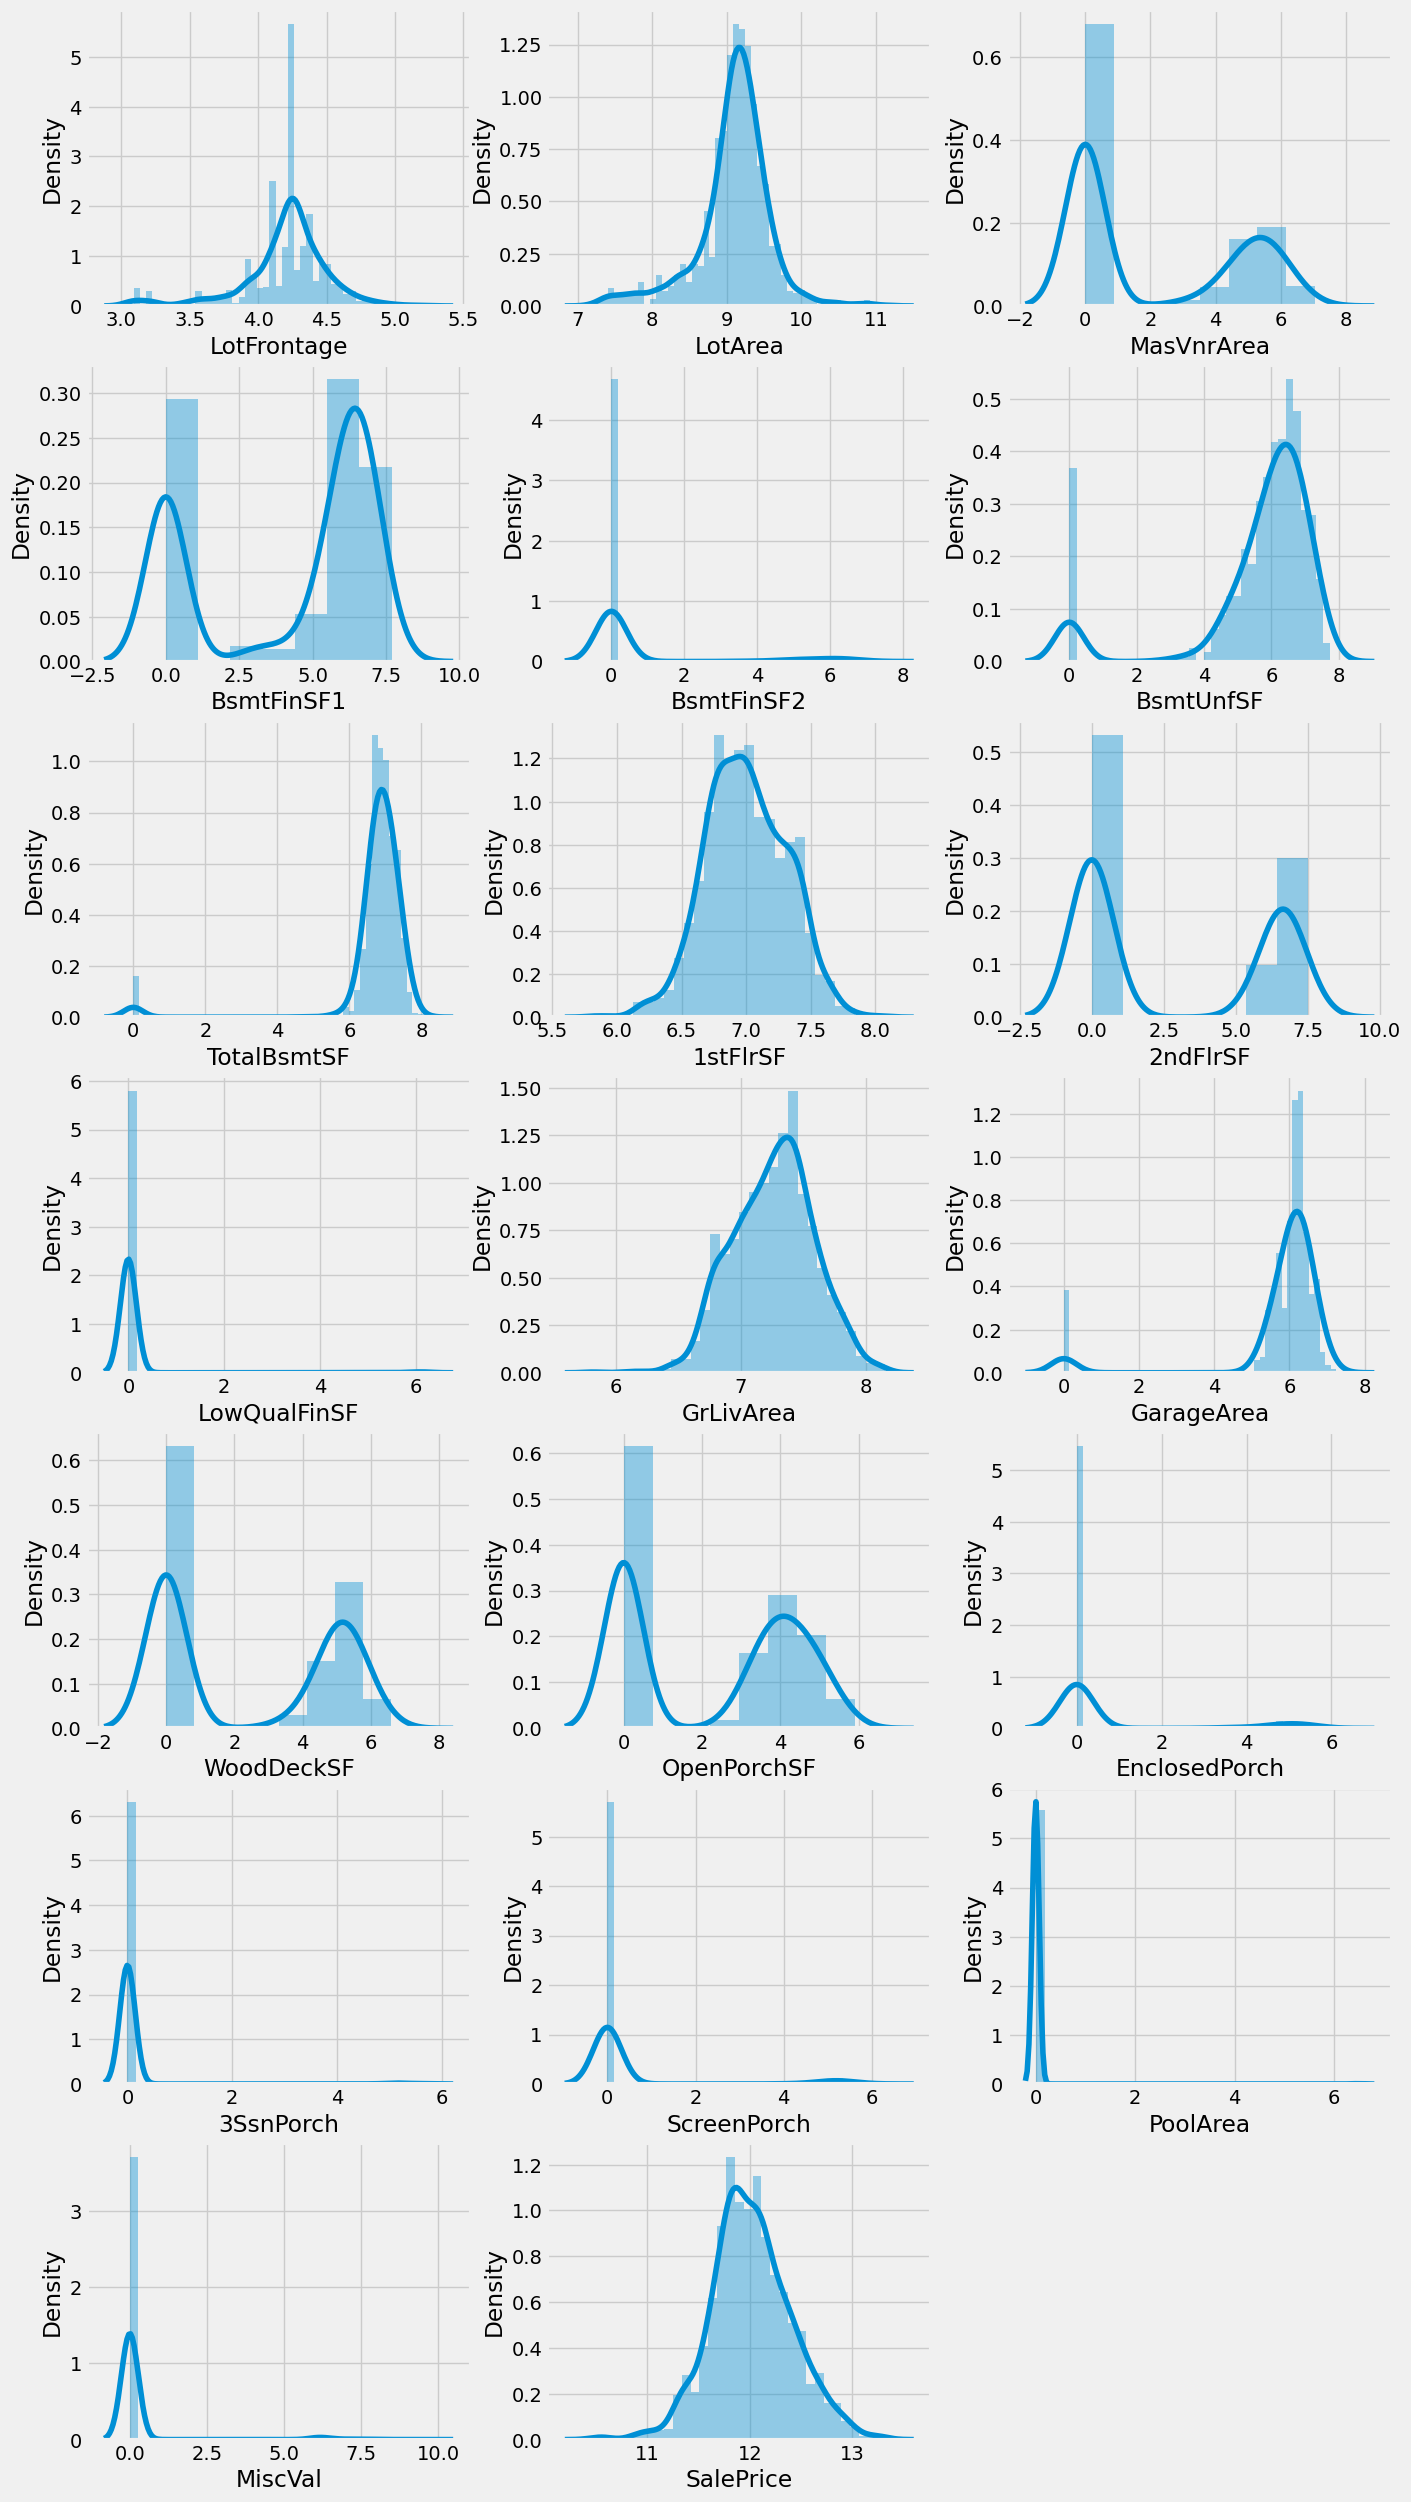

In [20]:
for i in range(len(quant_columns)):
    plt.subplot(7,3,i+1)
    sns.distplot(data[quant_columns[i]])
plt.subplot(7,3,20)
sns.distplot(data['SalePrice'])

## Data Preparation ##

We will remove the **'id'** colums as it does not affect the sale price

In [21]:
data = data.drop(['Id'], axis = 1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1437 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1437 non-null   int64  
 1   MSZoning       1437 non-null   object 
 2   LotFrontage    1437 non-null   float64
 3   LotArea        1437 non-null   float64
 4   Street         1437 non-null   object 
 5   Alley          1437 non-null   object 
 6   LotShape       1437 non-null   object 
 7   LandContour    1437 non-null   object 
 8   Utilities      1437 non-null   object 
 9   LotConfig      1437 non-null   object 
 10  LandSlope      1437 non-null   object 
 11  Neighborhood   1437 non-null   object 
 12  Condition1     1437 non-null   object 
 13  Condition2     1437 non-null   object 
 14  BldgType       1437 non-null   object 
 15  HouseStyle     1437 non-null   object 
 16  OverallQual    1437 non-null   int64  
 17  OverallCond    1437 non-null   int64  
 18  YearBuilt    

**We will convert all categorical values to numerical values**

In [23]:
data.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1437 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1437 non-null   object
 1   Street         1437 non-null   object
 2   Alley          1437 non-null   object
 3   LotShape       1437 non-null   object
 4   LandContour    1437 non-null   object
 5   Utilities      1437 non-null   object
 6   LotConfig      1437 non-null   object
 7   LandSlope      1437 non-null   object
 8   Neighborhood   1437 non-null   object
 9   Condition1     1437 non-null   object
 10  Condition2     1437 non-null   object
 11  BldgType       1437 non-null   object
 12  HouseStyle     1437 non-null   object
 13  RoofStyle      1437 non-null   object
 14  RoofMatl       1437 non-null   object
 15  Exterior1st    1437 non-null   object
 16  Exterior2nd    1437 non-null   object
 17  MasVnrType     1437 non-null   object
 18  ExterQual      1437 non-null   ob

Now we will **one-hot encode** all categorical columns

In [24]:
object_columns=data.select_dtypes('object').columns
object_columns_list=object_columns.tolist()
for i in object_columns_list:
    data_dummies=pd.get_dummies(data[i],prefix=i)
    data_dummies=data_dummies.astype(int)
    data=pd.concat([data,data_dummies],axis=1)
    data=data.drop(i,axis=1)

In [25]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1437 entries, 0 to 1459
Columns: 299 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(21), int64(278)
memory usage: 3.3 MB


In [27]:
Newobject_columns=data.select_dtypes('int').columns
Newobject_columns_list=Newobject_columns.tolist()
print(Newobject_columns_list)

['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_No Alley', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neigh

We will add 2 columns that represent possible values that are not present in the training set: **'Condition2_PosA'** and **'PoolQC_Ex'**

In [28]:
data['Condition2_PosA']=0
data['PoolQC_Ex']=0

## Splitting the data ##

- We will put the **'SalePrice'** column into the variable **y** so it represents the targets' column
- Then, we will drop the **'SalePrice'** column and place the resulting dataframe into the **x** variable so it represents the features' dataframe

In [29]:
y=data['SalePrice']
x=data.drop(['SalePrice'],axis=1)

We will split the data into a **training set** (75%), **test set** (25%)

In [30]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1077, 300) (1077,)
(360, 300) (360,)


## Training the model ##

In this section, we will proceed as follows:

- We will train different types of models
- We will test the accuracy of each model
- We will choose the model that produces the highest accuracy

For that we need to create a function that computes a model's **accuracy**

In [31]:
def mymodel(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    train_r2 = model.score(X_train, Y_train)
    test_r2 = model.score(X_test, Y_test)

    mse = mean_squared_error(Y_test, Y_pred)
    rmse=mse**(0.5)
    print("Model :-", str(model))
    print(f"\nRoot Mean Squared Error (RMSE): {rmse}")
    print(f"\nTraining R-squared (R2): {train_r2} \nTesting R-squared (R2): {test_r2}")
    print('--------------------------------------')
    print()
    return model

In [32]:
LinReg=mymodel(LinearRegression())
Rid=mymodel(Ridge())
DecTreeReg=mymodel(DecisionTreeRegressor())
RandForReg=mymodel(RandomForestRegressor())
GradBoostReg=mymodel(GradientBoostingRegressor())
svr=mymodel(SVR())
XGBReg=mymodel(XGBRegressor())

Model :- LinearRegression()

Root Mean Squared Error (RMSE): 0.13424093414308716

Training R-squared (R2): 0.954959326850473 
Testing R-squared (R2): 0.8764516928779412
--------------------------------------

Model :- Ridge()

Root Mean Squared Error (RMSE): 0.12334015448152447

Training R-squared (R2): 0.9537004018007008 
Testing R-squared (R2): 0.8957020328323955
--------------------------------------

Model :- DecisionTreeRegressor()

Root Mean Squared Error (RMSE): 0.19567035525967522

Training R-squared (R2): 1.0 
Testing R-squared (R2): 0.7375074784566973
--------------------------------------

Model :- RandomForestRegressor()

Root Mean Squared Error (RMSE): 0.13679123364454543

Training R-squared (R2): 0.9835145625554521 
Testing R-squared (R2): 0.8717127781674363
--------------------------------------

Model :- GradientBoostingRegressor()

Root Mean Squared Error (RMSE): 0.12349673282060407

Training R-squared (R2): 0.9653858346763424 
Testing R-squared (R2): 0.895437055568786

Based on the results above, we will choose a **Ridge** model to predict house sale prices because this type of model gave us the lowest RMSE score and the highest R2 score across the test set

In [33]:
model=Rid

We will save the **final trained model** and the **metadata**.

In [34]:
# --- Save final trained model and metadata ---
import joblib, json
from datetime import datetime

try:
    PROJECT_ROOT
except NameError:
    cwd = os.getcwd()
    PROJECT_ROOT = os.path.abspath(os.path.join(cwd, "..")) if os.path.basename(cwd).lower()=="notebooks" else cwd

results_dir = os.path.join(PROJECT_ROOT, "results")
os.makedirs(results_dir, exist_ok=True)

model_fname = "final_model.pkl"
meta_fname = "final_model_metadata.json"
model_path = os.path.join(results_dir, model_fname)
meta_path = os.path.join(results_dir, meta_fname)

joblib.dump(model, model_path)

metadata = {
    "saved_at": datetime.utcnow().isoformat() + "Z",
    "model_variable": "model",
    "model_file": model_fname,
    "notebook": "notebooks/HousePricePredictionNotebook.ipynb",
    # add fields below as appropriate (fill or leave)
    "notes": "Final model trained in notebook. Replace fields below with actual values if desired.",
    "algorithm": getattr(model, "__class__", None).__name__ if 'model' in globals() else None,
    "random_state": getattr(model, "random_state", None),
    "training_rows": len(X_train),   
    "training_features": None,
    "model_predicts_log1p": True
}
try:
    if 'X' in globals():
        metadata["training_rows"] = getattr(X, "shape", (None, None))[0]
        metadata["training_features"] = getattr(X, "shape", (None, None))[1]
    elif 'X_train' in globals():
        metadata["training_rows"] = getattr(X_train, "shape", (None, None))[0]
        metadata["training_features"] = getattr(X_train, "shape", (None, None))[1]
except Exception:
    pass

with open(meta_path, "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=2)

print("Saved model to:", model_path)
print("Saved metadata to:", meta_path)


Saved model to: C:\Users\pc\OneDrive\Documents\Codes\Python codes\Machine Learning\Projects\House Price Prediction\house-prices-ml\results\final_model.pkl
Saved metadata to: C:\Users\pc\OneDrive\Documents\Codes\Python codes\Machine Learning\Projects\House Price Prediction\house-prices-ml\results\final_model_metadata.json


## Predicting Sale Prices ##

Now we will load the **'test.csv'** file in order to predict the sale prices of houses listed in the file

In [35]:
TEST_CSV = os.path.join(DATA_DIR, "test.csv")

In [36]:
TestData=pd.read_csv(TEST_CSV)
TestData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In order to make accurate predictions, we have to reprocess the dataset just like we did with our training set:

1. We need to handle **null** values
2. We have to **log transform** the data
3. Drop the **'Id'** column
4. **One-hot** encode categorical columns

In [37]:
numerical_columns=TestData.select_dtypes(include=[np.number])
numerical_columns.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

After inspecting the test data we find that the examples where the values of **'BsmtFinSF1'**, **'BsmtFinSF2'**, **'BsmtUnfSF'**, **'TotalBsmtSF'**, **'BsmtFullBath'** and **'BsmtHalfBath'** are null correspond to a non basement house so we will convert these null values to **0**.

We also find that the example where **'GarageCars'** and **'GarageArea'** are null **(id=2577)** there is a garage so we will replace the null values with the **median** of each column respectively.

One more thing, after examining the data we find that there are 2 examples where **'GarageYrBlt'** is null **(id=2127, id=2577)** but there is a garage in fact so only for these 2 examples we will replace the null value with the **median** of this column and for the other examples we will replace the null values with **0** (but don't worry, in the training set all the null values in this column were corresponding to a non garage house, that's why we filled all the null values there with **0**).

In [38]:
median=TestData['GarageYrBlt'].median()
TestData.loc[666,'GarageYrBlt']=median        # corresponds to id=2127
TestData.loc[1116,'GarageYrBlt']=median       # corresponds to id=2577

In [39]:
TestData['LotFrontage'] = TestData['LotFrontage'].fillna(TestData['LotFrontage'].median())
TestData['MasVnrArea'] = TestData['MasVnrArea'].fillna(TestData['MasVnrArea'].median())
TestData['BsmtFinSF1'] = TestData['BsmtFinSF1'].fillna(0)
TestData['BsmtFinSF2'] = TestData['BsmtFinSF2'].fillna(0)
TestData['BsmtUnfSF'] = TestData['BsmtUnfSF'].fillna(0)
TestData['TotalBsmtSF'] = TestData['TotalBsmtSF'].fillna(0)
TestData['BsmtFullBath'] = TestData['BsmtFullBath'].fillna(0)
TestData['BsmtHalfBath'] = TestData['BsmtHalfBath'].fillna(0)
TestData['GarageYrBlt'] = TestData['GarageYrBlt'].fillna(0)
TestData['GarageCars'] = TestData['GarageCars'].fillna(TestData['GarageCars'].median())
TestData['GarageArea'] = TestData['GarageArea'].fillna(TestData['GarageArea'].median())

In [40]:
numerical_columns=TestData.select_dtypes(include=[np.number])
numerical_columns.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [41]:
categorical_columns=TestData.select_dtypes(include=object)
categorical_columns.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

For **id=2041**, **id=2186** and **id=2525**, there is a basement so we will replace the null values of **'BsmtCond'** with the mode of this column

In [42]:
TestData.loc[580,'BsmtCond']=TestData['BsmtCond'].mode()[0]    # corresponds to id=2041
TestData.loc[725,'BsmtCond']=TestData['BsmtCond'].mode()[0]    # corresponds to id=2186
TestData.loc[1064,'BsmtCond']=TestData['BsmtCond'].mode()[0]   # corresponds to id=2525

Also for **id=2218** and **id=2219**,  there is a basement so we will replace the null values of **'BsmtQual'** with the mode of this column

In [43]:
TestData.loc[757,'BsmtQual']=TestData['BsmtQual'].mode()[0]    # corresponds to id=2218
TestData.loc[759,'BsmtQual']=TestData['BsmtQual'].mode()[0]    # corresponds to id=2219

Also for **id=2127** and **id=2577**,  there is a basement so we will replace the null values of **'GarageFinish'**, **'GarageQual'** and **'GarageCond'** with the mode of each column respectively

In [44]:
TestData.loc[666,'GarageFinish']=TestData['GarageFinish'].mode()[0]     # corresponds to id=2127
TestData.loc[1116,'GarageFinish']=TestData['GarageFinish'].mode()[0]    # corresponds to id=2577
TestData.loc[666,'GarageQual']=TestData['GarageQual'].mode()[0]
TestData.loc[1116,'GarageQual']=TestData['GarageQual'].mode()[0]
TestData.loc[666,'GarageCond']=TestData['GarageCond'].mode()[0]
TestData.loc[1116,'GarageCond']=TestData['GarageCond'].mode()[0]

In [45]:
TestData['MSZoning']=TestData['MSZoning'].fillna(TestData['MSZoning'].mode()[0])
TestData['Alley']=TestData['Alley'].fillna('No Alley')
TestData['Utilities']=TestData['Utilities'].fillna(TestData['Utilities'].mode()[0])
TestData['Exterior1st']=TestData['Exterior1st'].fillna(TestData['Exterior1st'].mode()[0])
TestData['Exterior2nd']=TestData['Exterior2nd'].fillna(TestData['Exterior2nd'].mode()[0])
TestData['MasVnrType'] = TestData['MasVnrType'].replace('None', 'No Masonry Veneer')
TestData['MasVnrType'] = TestData['MasVnrType'].fillna('No Masonry Veneer')
TestData['BsmtQual']=TestData['BsmtQual'].fillna('No Basement')
TestData['BsmtCond']=TestData['BsmtCond'].fillna('No Basement')
TestData['BsmtExposure']=TestData['BsmtExposure'].fillna('No Basement')
TestData['BsmtFinType1']=TestData['BsmtFinType1'].fillna('No Basement')
TestData['BsmtFinType2']=TestData['BsmtFinType2'].fillna('No Basement')
TestData['KitchenQual']=TestData['KitchenQual'].fillna(TestData['KitchenQual'].mode()[0])
TestData['Functional']=TestData['Functional'].fillna(TestData['Functional'].mode()[0])
TestData['FireplaceQu']=TestData['FireplaceQu'].fillna('No Fireplace')
TestData['GarageType']=TestData['GarageType'].fillna('No Garage')
TestData['GarageFinish']=TestData['GarageFinish'].fillna('No Garage')
TestData['GarageQual']=TestData['GarageQual'].fillna('No Garage')
TestData['GarageCond']=TestData['GarageCond'].fillna('No Garage')
TestData['PoolQC']=TestData['PoolQC'].fillna('No Pool')
TestData['Fence']=TestData['Fence'].fillna('No Fence')
TestData['MiscFeature']=TestData['MiscFeature'].fillna('No Miscellaneous feature')
TestData['SaleType']=TestData['SaleType'].fillna(TestData['SaleType'].mode()[0])

In [46]:
categorical_columns=TestData.select_dtypes(include=object)
categorical_columns.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

Now let's **log transform** the same columns we transformed in the training set (but we won't transform the **'SalePrice'** column because it's not present in the **'test.csv'** file)

In [47]:
quant_columns=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for i in quant_columns:
    TestData[i]=np.log(1+TestData[i])

Now we will drop the **'Id'** column

In [48]:
x=TestData.drop(['Id'],axis=1)

Now we will **one-hot encode** all categorical columns

In [49]:
object_columns=x.select_dtypes('object').columns
object_columns_list=object_columns.tolist()
for i in object_columns_list:
    data_dummies=pd.get_dummies(x[i],prefix=i)
    data_dummies=data_dummies.astype(int)
    x=pd.concat([x,data_dummies],axis=1)
    x=x.drop(i,axis=1)

In [50]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,20,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,60,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,60,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,120,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [51]:
Newobject_columns=data.select_dtypes('int').columns
Newobject_columns_list=Newobject_columns.tolist()
print(Newobject_columns_list)

['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_No Alley', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neigh

We will add columns that represent values seen in the training set but not here in the test set: **'Condition2_RRAe'**, **'Condition2_RRAn'**, **'Condition2_RRNn'**, **'Electrical_Mix'**, **'Exterior1st_ImStucc'**, and others

In [52]:
x['Condition2_RRAe']=0
x['Condition2_RRAn']=0
x['Condition2_RRNn']=0
x['Electrical_Mix']=0
x['Exterior1st_ImStucc']=0
x['Exterior1st_Stone']=0
x['Exterior2nd_Other']=0
x['GarageQual_Ex']=0
x['Heating_Floor']=0
x['Heating_OthW']=0
x['HouseStyle_2.5Fin']=0
x['PoolQC_Fa']=0
x['RoofMatl_Membran']=0
x['RoofMatl_Metal']=0
x['RoofMatl_Roll']=0
x['Utilities_NoSeWa']=0

We also have to rerrange the **order** of the columns in the test set to match the order of columns in the training set

In [53]:
x=x.reindex(columns=X_train.columns)

In [54]:
PredictionsBeforeTransform=model.predict(x)

In [55]:
Predictions=np.expm1(PredictionsBeforeTransform)

In [56]:
print(Predictions)

[125862.4672972  159917.04424915 187509.40452966 ... 169366.75142159
 123340.29735024 219337.20298834]


## Prediction CSV file ##

Finally, we will create a new csv file that contains 2 columns:

- **'Id'**: This will be the same column as the **'Id'** column in the **'test.csv'** file (contains the same values)
- **'SalePrice'**: Will contain the predicted sale price by the model for each house

In [57]:
PredDf=pd.DataFrame({'Id':TestData['Id'],'SalePrice':Predictions})
PredDf.to_csv('submission.csv',index=False)
PredDf.head()

,Id,SalePrice
0,1461,125862.467297
1,1462,159917.044249
2,1463,187509.404530
3,1464,200813.173167
4,1465,207328.253988
